In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [6]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [7]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [19]:
sys.path.append("../../")
from smash import SMaSH

sm = SMaSH()

 * Initialising ...


In [21]:
sys.path.append("/home/ubuntu/Taneda/Functions")
from scRNA_functions import scRNA_functions

fc = scRNA_functions()

 * Initialising ...


# Loading annData object

In [22]:
obj = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [23]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

3451 genes across 2730 cells


In [24]:
dict_annotation = {}

dict_annotation['1Ery']='Ery'
dict_annotation['2Ery']='Ery'
dict_annotation['3Ery']='Ery'
dict_annotation['4Ery']='Ery'
dict_annotation['5Ery']='Ery'
dict_annotation['6Ery']='Ery'
dict_annotation['7MEP']='MEP'
dict_annotation['8Mk']='Mk'
dict_annotation['9GMP']='GMP'
dict_annotation['10GMP']='GMP'
dict_annotation['11DC']='DC'
dict_annotation['12Baso']='Baso'
dict_annotation['13Baso']='Baso'
dict_annotation['14Mo']='Mo'
dict_annotation['15Mo']='Mo'
dict_annotation['16Neu']='Neu'
dict_annotation['17Neu']='Neu'
dict_annotation['18Eos']='Eos'
dict_annotation['19Lymph']='Lymph'

annotation = []
for celltype in obj.obs["paul15_clusters"].tolist():
    annotation.append(dict_annotation[celltype])

obj.obs['annotation'] = annotation
obj.obs['annotation'] = obj.obs['annotation'].astype("category")

#### Data preparation

In [25]:
sf.data_preparation(obj)

#### Removing general genes

In [26]:
s1 = time.time()

In [27]:
obj = sf.remove_general_genes(obj)

#### Removing house-keeping genes

http://www.housekeeping.unicamp.br/?homePageGlobal

In [29]:
obj = sf.remove_housekeepingenes(obj, path="../../data/house_keeping_genes_Mouse_bone_marrow.txt")
obj = sf.remove_housekeepingenes(obj, path="../../data/house_keeping_genes_Mouse_HSC.txt")

#### Removing genes expressed in less than 30% within groups

In [30]:
obj = sf.remove_features_pct(obj, group_by="annotation", pct=0.3)

#### Removing genes expressed in more than 50% in a given group where genes are expressed for more 75% within a given group

In [31]:
obj = sf.remove_features_pct_2groups(obj, group_by="annotation", pct1=0.75, pct2=0.5)

#### Revert PCA

In [32]:
obj = sf.scale_filter_features(obj, n_components=None, filter_expression=True)

Fraction passing PCA: 0.98786717752235


#### DNN

In [33]:
s2 = time.time()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                49536     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0

22/22 [==============================] - 0s 5ms/step - loss: 1.0945 - accuracy: 0.7592 - auc: 0.9672 - precision: 0.9961 - recall: 0.0514 - val_loss: 1.4563 - val_accuracy: 0.7106 - val_auc: 0.9555 - val_precision: 1.0000 - val_recall: 0.0201

Epoch 00019: val_loss improved from 1.49162 to 1.45633, saving model to weights/best_model_annotation.h5
Epoch 20/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0813 - accuracy: 0.7756 - auc: 0.9731 - precision: 1.0000 - recall: 0.0506 - val_loss: 1.4308 - val_accuracy: 0.7289 - val_auc: 0.9572 - val_precision: 1.0000 - val_recall: 0.0256

Epoch 00020: val_loss improved from 1.45633 to 1.43081, saving model to weights/best_model_annotation.h5
Epoch 21/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0434 - accuracy: 0.7872 - auc: 0.9720 - precision: 0.9993 - recall: 0.0822 - val_loss: 1.3672 - val_accuracy: 0.7253 - val_auc: 0.9602 - val_precision: 1.0000 - val_recall: 0.0330

Epoch 00021: val_loss improved f


Epoch 00042: val_loss improved from 0.94540 to 0.92632, saving model to weights/best_model_annotation.h5
Epoch 43/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.9437 - auc: 0.9978 - precision: 0.9957 - recall: 0.7411 - val_loss: 0.9162 - val_accuracy: 0.7491 - val_auc: 0.9679 - val_precision: 0.8545 - val_recall: 0.5165

Epoch 00043: val_loss improved from 0.92632 to 0.91624, saving model to weights/best_model_annotation.h5
Epoch 44/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4450 - accuracy: 0.9525 - auc: 0.9980 - precision: 0.9946 - recall: 0.7694 - val_loss: 0.8738 - val_accuracy: 0.7619 - val_auc: 0.9695 - val_precision: 0.8676 - val_recall: 0.5641

Epoch 00044: val_loss improved from 0.91624 to 0.87384, saving model to weights/best_model_annotation.h5
Epoch 45/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.9609 - auc: 0.9984 - precision: 0.9939 - recall: 0.7725 - val_loss: 0.8768 

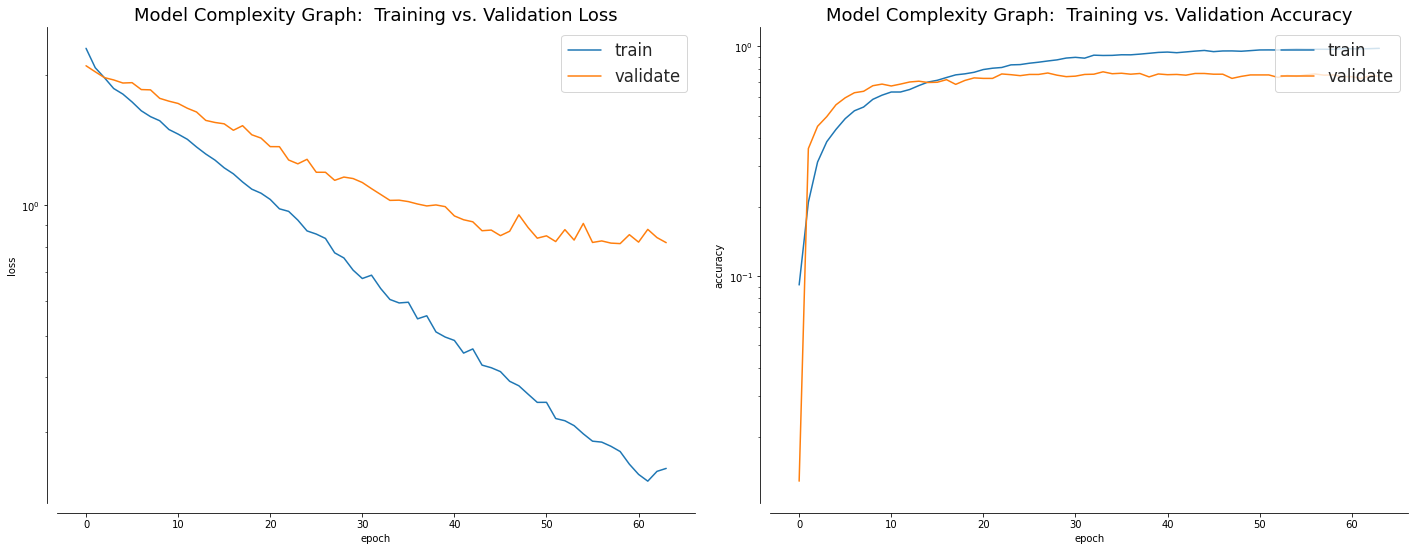

<Figure size 432x288 with 0 Axes>

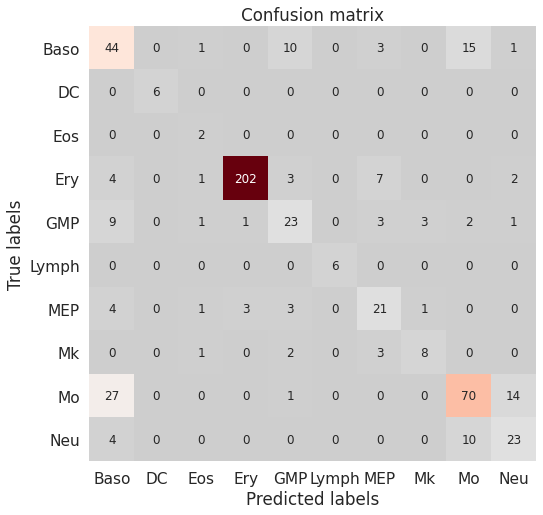

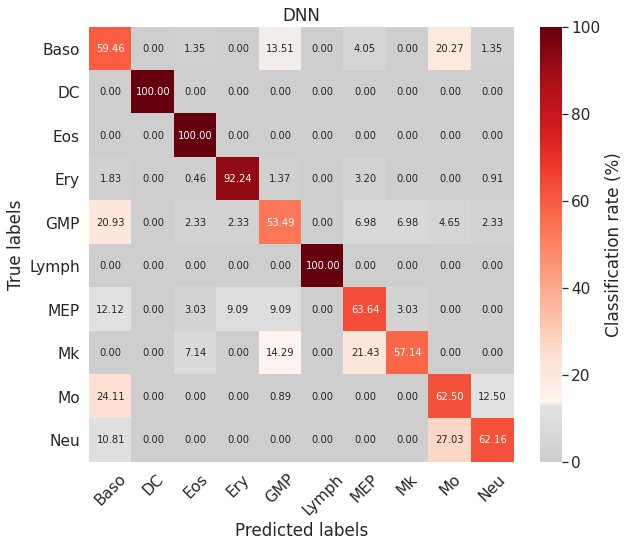

              precision    recall  f1-score   support

        Baso       0.48      0.59      0.53        74
          DC       1.00      1.00      1.00         6
         Eos       0.29      1.00      0.44         2
         Ery       0.98      0.92      0.95       219
         GMP       0.55      0.53      0.54        43
       Lymph       1.00      1.00      1.00         6
         MEP       0.57      0.64      0.60        33
          Mk       0.67      0.57      0.62        14
          Mo       0.72      0.62      0.67       112
         Neu       0.56      0.62      0.59        37

    accuracy                           0.74       546
   macro avg       0.68      0.75      0.69       546
weighted avg       0.76      0.74      0.75       546

18/18 [==============================] - 0s 1ms/step - loss: 0.8159 - accuracy: 0.7509 - auc: 0.9653 - precision: 0.8255 - recall: 0.6410


In [34]:
sf.DNN(obj, group_by="annotation", model=None, balance=True, verbose=True, save=False)

#### Shap value

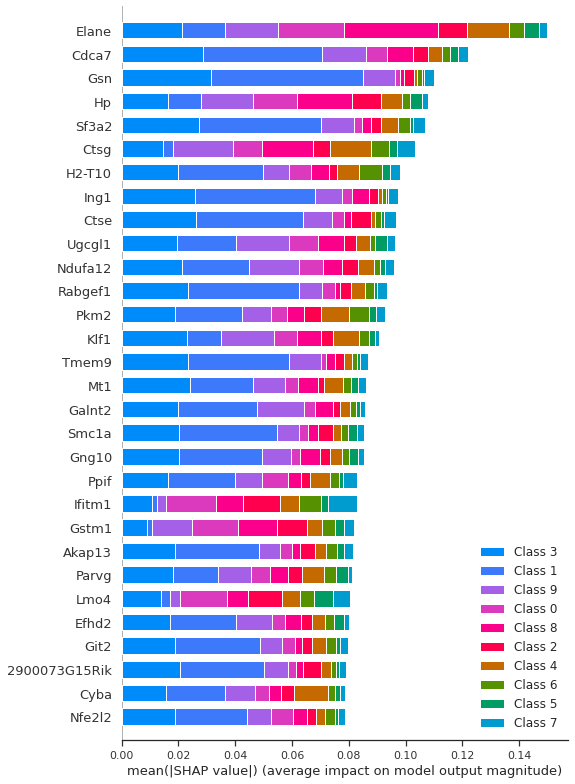

In [35]:
selectedGenes, selectedGenes_dict = sf.run_shap(obj, group_by="annotation", model=None, verbose=True, pct=0.1, restrict_top=("local", 20))

In [36]:
e2 = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

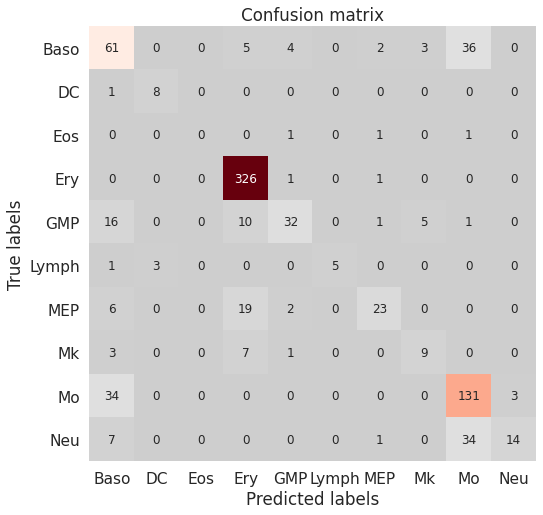

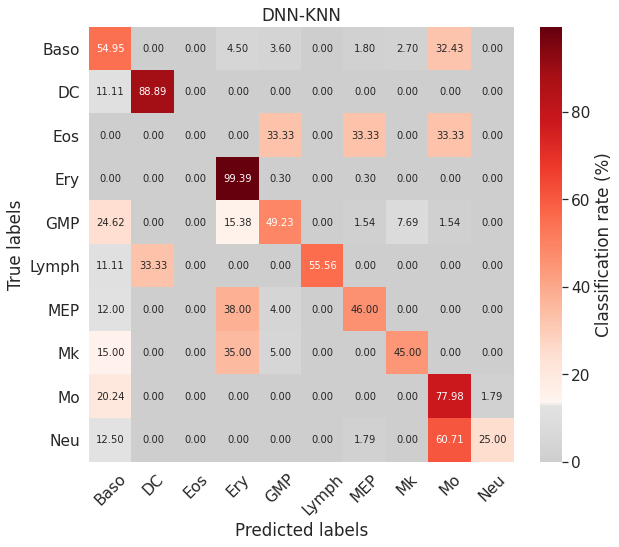

Accuracy: 0.7435897435897436: Misclassification: 0.2564102564102564
              precision    recall  f1-score   support

        Baso       0.47      0.55      0.51       111
          DC       0.73      0.89      0.80         9
         Eos       0.00      0.00      0.00         3
         Ery       0.89      0.99      0.94       328
         GMP       0.78      0.49      0.60        65
       Lymph       1.00      0.56      0.71         9
         MEP       0.79      0.46      0.58        50
          Mk       0.53      0.45      0.49        20
          Mo       0.65      0.78      0.71       168
         Neu       0.82      0.25      0.38        56

    accuracy                           0.74       819
   macro avg       0.67      0.54      0.57       819
weighted avg       0.75      0.74      0.73       819



In [37]:
sf.run_classifiers(obj, group_by="annotation", genes=selectedGenes, classifier="KNN", balance=True, title="DNN-KNN", save=False)

#### Sorting genes per cluster

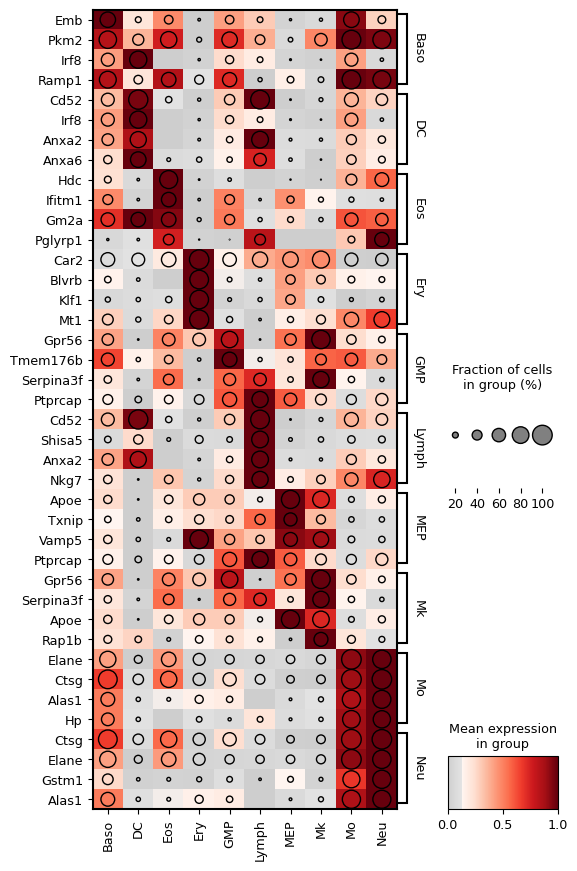

In [38]:
axs, selectedGenes_top_dict = sf.sort_and_plot(obj, selectedGenes, group_by="annotation", group_by2=None, top=4, figsize=(6,10))

In [39]:
e1 = time.time()

# Elapsed time

In [40]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

1547 genes across 2730 cells


In [41]:
print('Elapsed time (s): ', e1-s1)

Elapsed time (s):  70.4374475479126


In [42]:
print('Elapsed time (s): ', e2-s2)

Elapsed time (s):  17.056290864944458
